In [211]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier




In [28]:
logins = pd.read_json('logins.json')

In [29]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [30]:
logins.dtypes

login_time    datetime64[ns]
dtype: object

In [31]:
logins.set_index('login_time', inplace=True)


In [32]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Empty DataFrame

In [33]:
logins['count'] = 1


In [42]:
logins_15 = logins.resample('15T', how='sum')


C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


In [43]:
logins_15.head(5)

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


(array([719163., 719177., 719194., 719208., 719222., 719236., 719253.,
        719267.]), <a list of 8 Text xticklabel objects>)

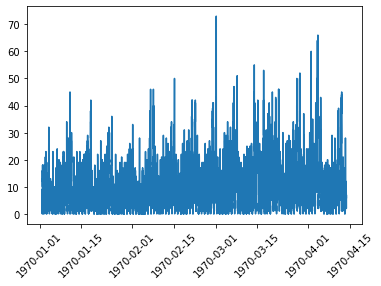

In [46]:
plt.plot(logins_15)
plt.xticks(rotation=45)

In [49]:
logins_15.tail()

,count
login_time,
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2
1970-04-13 18:30:00,7
1970-04-13 18:45:00,6


## User logins start from January 1 1970 from 20:00:00 and goes on till April 13 18:45:00

In [50]:
logins_15['count'].max()

73

In [51]:
logins_15[logins_15['count']==73]

,count
login_time,
1970-03-01 04:30:00,73


In [52]:
logins_15['count'].min()

0

In [53]:
logins_15[logins_15['count']==0]

,count
login_time,
1970-01-01 21:30:00,0
1970-01-02 04:15:00,0
1970-01-02 06:15:00,0
1970-01-02 18:00:00,0
1970-01-03 08:45:00,0
...,...
1970-04-11 08:45:00,0
1970-04-13 05:30:00,0
1970-04-13 06:00:00,0


In [55]:
logins_15['login_time'] = logins_15.index


In [56]:
logins_15.head()

,count,login_time
login_time,,
1970-01-01 20:00:00,2,1970-01-01 20:00:00
1970-01-01 20:15:00,6,1970-01-01 20:15:00
1970-01-01 20:30:00,9,1970-01-01 20:30:00
1970-01-01 20:45:00,7,1970-01-01 20:45:00
1970-01-01 21:00:00,1,1970-01-01 21:00:00


In [59]:
logins_15.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


In [64]:
ts = pd.Timestamp(year = 1970, month = 3, day = 1,  
                  hour = 4, second = 1)

In [66]:
ts.weekday_name

C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  """Entry point for launching an IPython kernel.


'Sunday'

## Max count of 73 was on sunday 4:30 am of march 3rd

In [67]:
logins_15['count'].value_counts()

2     726
4     706
3     703
5     658
1     638
     ... 
66      1
55      1
52      1
54      1
51      1
Name: count, Length: 62, dtype: int64

In [71]:
greater_then_35 = logins_15[logins_15['count']>=35]

In [74]:
logins_15['Day'] = logins_15['login_time'].dt.weekday_name

In [76]:
logins_15['Day'].value_counts()

Sunday       1440
Friday       1440
Saturday     1440
Monday       1420
Thursday     1360
Wednesday    1344
Tuesday      1344
Name: Day, dtype: int64

## Week ends and starting days of the week have more clicks then mid week days

In [78]:
higher_counts = logins_15[logins_15['count']>=35]

In [79]:
higher_counts['Day'].value_counts()

Sunday       62
Saturday     57
Friday       22
Tuesday       5
Wednesday     5
Thursday      3
Monday        2
Name: Day, dtype: int64

## Larger counts (counts greater then 35) are all occuring in weekends

In [90]:
logins_15['Month_name'] = logins_15['login_time'].dt.month

In [91]:
logins_15

,count,login_time,Day,Month_name
login_time,,,,
1970-01-01 20:00:00,2,1970-01-01 20:00:00,Thursday,1
1970-01-01 20:15:00,6,1970-01-01 20:15:00,Thursday,1
1970-01-01 20:30:00,9,1970-01-01 20:30:00,Thursday,1
1970-01-01 20:45:00,7,1970-01-01 20:45:00,Thursday,1
1970-01-01 21:00:00,1,1970-01-01 21:00:00,Thursday,1
...,...,...,...,...
1970-04-13 17:45:00,5,1970-04-13 17:45:00,Monday,4
1970-04-13 18:00:00,5,1970-04-13 18:00:00,Monday,4
1970-04-13 18:15:00,2,1970-04-13 18:15:00,Monday,4


In [92]:
january_logins = logins_15[logins_15['Month_name']==1]

In [93]:
january_logins_count = january_logins['count']

(array([719163., 719167., 719171., 719175., 719179., 719183., 719187.,
        719191., 719194.]), <a list of 9 Text xticklabel objects>)

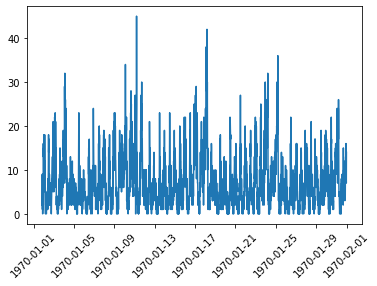

In [94]:
plt.plot(january_logins_count)
plt.xticks(rotation=45)

In [96]:
january_logins['Day'].value_counts()

Friday       480
Saturday     480
Thursday     400
Monday       384
Sunday       384
Wednesday    384
Tuesday      384
Name: Day, dtype: int64

## Number of clicks for January shows high in weekends and gradually drops from sunday

In [103]:
january_logins['count'].max()

45

In [104]:
january_logins[january_logins['count']==45]

,count,login_time,Day,Month_name
login_time,,,,
1970-01-11 04:45:00,45,1970-01-11 04:45:00,Sunday,1


## Maximum count is on a sunday for january

In [97]:
february_logins = logins_15[logins_15['Month_name']==2]

In [99]:
february_logins.head()

,count,login_time,Day,Month_name
login_time,,,,
1970-02-01 00:00:00,12,1970-02-01 00:00:00,Sunday,2
1970-02-01 00:15:00,11,1970-02-01 00:15:00,Sunday,2
1970-02-01 00:30:00,17,1970-02-01 00:30:00,Sunday,2
1970-02-01 00:45:00,15,1970-02-01 00:45:00,Sunday,2
1970-02-01 01:00:00,16,1970-02-01 01:00:00,Sunday,2


In [100]:
february_logins['Day'].value_counts()

Friday       384
Saturday     384
Monday       384
Thursday     384
Sunday       384
Wednesday    384
Tuesday      384
Name: Day, dtype: int64

In [101]:
february_logins_count = february_logins['count']

(array([719194., 719198., 719202., 719206., 719210., 719214., 719218.,
        719222.]), <a list of 8 Text xticklabel objects>)

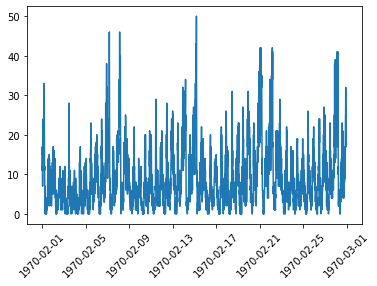

In [102]:
plt.plot(february_logins_count)
plt.xticks(rotation=45)

In [105]:
february_logins['count'].max()

50

In [107]:
february_logins[february_logins['count']==50]

,count,login_time,Day,Month_name
login_time,,,,
1970-02-15 04:45:00,50,1970-02-15 04:45:00,Sunday,2


## Maximum count on februray is also a sunday and once again it is early morning 4:45 AM

In [108]:
april_logins = logins_15[logins_15['Month_name']==4]

In [109]:
april_logins

,count,login_time,Day,Month_name
login_time,,,,
1970-04-01 00:00:00,15,1970-04-01 00:00:00,Wednesday,4
1970-04-01 00:15:00,11,1970-04-01 00:15:00,Wednesday,4
1970-04-01 00:30:00,14,1970-04-01 00:30:00,Wednesday,4
1970-04-01 00:45:00,19,1970-04-01 00:45:00,Wednesday,4
1970-04-01 01:00:00,16,1970-04-01 01:00:00,Wednesday,4
...,...,...,...,...
1970-04-13 17:45:00,5,1970-04-13 17:45:00,Monday,4
1970-04-13 18:00:00,5,1970-04-13 18:00:00,Monday,4
1970-04-13 18:15:00,2,1970-04-13 18:15:00,Monday,4


In [110]:
april_logins['count'].max()

66

In [111]:
april_logins[april_logins['count']==66]

,count,login_time,Day,Month_name
login_time,,,,
1970-04-04 05:30:00,66,1970-04-04 05:30:00,Saturday,4


## In April the maximum count of 66 occurs on a saturday once again at very early morning

## Conclusion
## Trends suggest maximum counts occur during sundays of all months except on April
## Trends also tell us that logins gradually increase from start to end of the week and specifically at early morning hours

## PART-3

In [149]:
file = open('ultimate_data_challenge.json', 'r')
df = pd.DataFrame(json.load(file))
file.close()

df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [151]:
df.isnull().sum() / df.shape[0] * 100.00


city                       0.000
trips_in_first_30_days     0.000
signup_date                0.000
avg_rating_of_driver      16.244
avg_surge                  0.000
last_trip_date             0.000
phone                      0.792
surge_pct                  0.000
ultimate_black_user        0.000
weekday_pct                0.000
avg_dist                   0.000
avg_rating_by_driver       0.402
dtype: float64

## Since percentage of missing values indicate that dropping them wont result in much loss of data

In [152]:
df = df.dropna(axis=0)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 12 columns):
city                      41445 non-null object
trips_in_first_30_days    41445 non-null int64
signup_date               41445 non-null object
avg_rating_of_driver      41445 non-null float64
avg_surge                 41445 non-null float64
last_trip_date            41445 non-null object
phone                     41445 non-null object
surge_pct                 41445 non-null float64
ultimate_black_user       41445 non-null bool
weekday_pct               41445 non-null float64
avg_dist                  41445 non-null float64
avg_rating_by_driver      41445 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.8+ MB


In [154]:
df.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

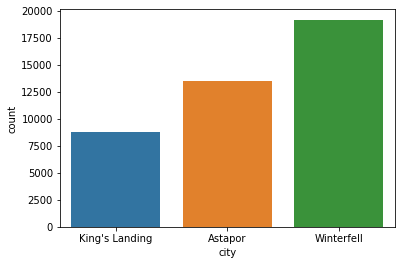

In [155]:
sns.countplot(x='city',data=df)

In [156]:
##Convert objects to date

In [157]:
df[['signup_date','last_trip_date']] = df[['signup_date','last_trip_date']].apply(pd.to_datetime)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 12 columns):
city                      41445 non-null object
trips_in_first_30_days    41445 non-null int64
signup_date               41445 non-null datetime64[ns]
avg_rating_of_driver      41445 non-null float64
avg_surge                 41445 non-null float64
last_trip_date            41445 non-null datetime64[ns]
phone                     41445 non-null object
surge_pct                 41445 non-null float64
ultimate_black_user       41445 non-null bool
weekday_pct               41445 non-null float64
avg_dist                  41445 non-null float64
avg_rating_by_driver      41445 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 5.1+ MB


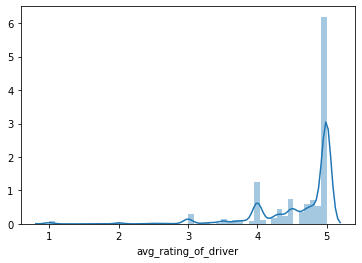

In [159]:
sns.distplot(df['avg_rating_of_driver'])

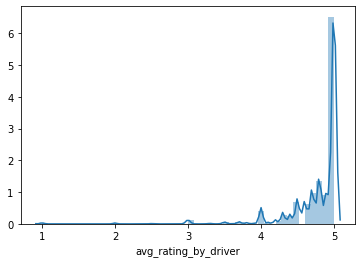

In [160]:
sns.distplot(df['avg_rating_by_driver'])

## Distributions of both the average rating given by rider over all the trips and average rating of driver over all trips look similar

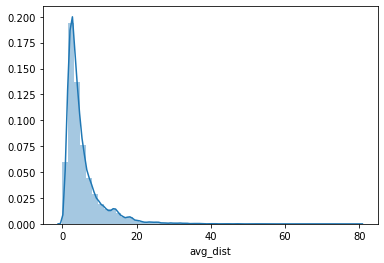

In [161]:
sns.distplot(df['avg_dist'])

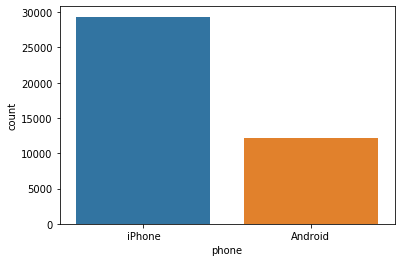

In [162]:
sns.countplot(x='phone',data=df)

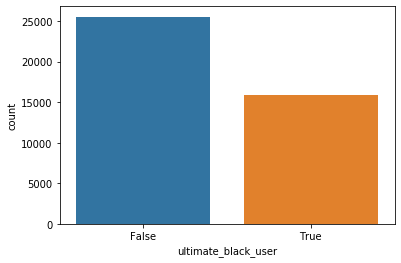

In [137]:
sns.countplot(x='ultimate_black_user',data=df)

## Creating retained column (target)
## we consider a user retained if they
## were “active” (i.e. took a trip) in the preceding 30 days

In [163]:
df['last_trip_date'].max()

Timestamp('2014-07-01 00:00:00')

In [164]:
df['retention'] = np.where(((df['last_trip_date'] > '2014-06-01')), '1', '0')

In [166]:
df['retention'].value_counts()/df.shape[0]*100


0    59.927615
1    40.072385
Name: retention, dtype: float64

In [167]:
## Drop last trip date from dataframe
df = df.drop('last_trip_date',axis=1)


In [168]:
df['retention'] = df['retention'].astype(str)

In [170]:
##Lets find categorical relationships with target column

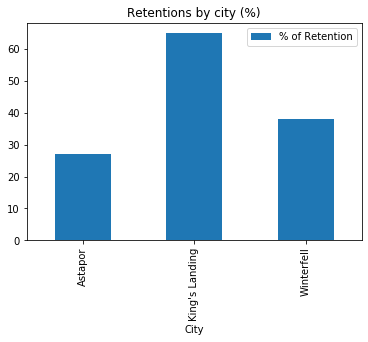

In [182]:
df_city = pd.DataFrame(columns=["City", "% of Retention"])
i=0
for cities in list(df['city'].unique()):
    ratio = df[(df['city']==cities)&(df['retention']=='1')].shape[0] / df[df['city']==cities].shape[0]
    df_city.loc[i] = (cities, ratio*100)
    i += 1
    #print("In {}, the ratio of Promotions is {:.2f}%".format(field, ratio*100))    
df_ct = df_city.groupby(by="City").sum()
df_ct.plot(kind='bar',title='Retentions by city (%)')

## Kings landing has highest percentage of retention

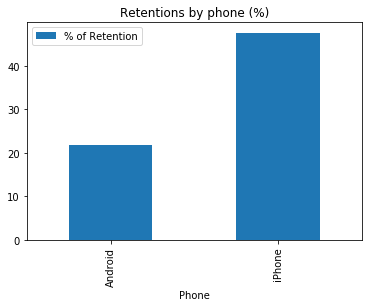

In [184]:
df_phone = pd.DataFrame(columns=["Phone", "% of Retention"])
i=0
for phones in list(df['phone'].unique()):
    ratio = df[(df['phone']==phones)&(df['retention']=='1')].shape[0] / df[df['phone']==phones].shape[0]
    df_phone.loc[i] = (phones, ratio*100)
    i += 1
    #print("In {}, the ratio of Promotions is {:.2f}%".format(field, ratio*100))    
df_ph = df_phone.groupby(by="Phone").sum()
df_ph.plot(kind='bar',title='Retentions by phone (%)')

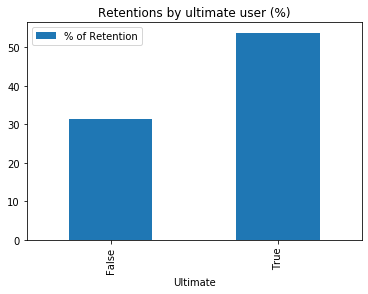

In [187]:
df_ultimate = pd.DataFrame(columns=["Ultimate", "% of Retention"])
i=0
for ultimate in list(df['ultimate_black_user'].unique()):
    ratio = df[(df['ultimate_black_user']==ultimate)&(df['retention']=='1')].shape[0] / df[df['ultimate_black_user']==ultimate].shape[0]
    df_ultimate.loc[i] = (ultimate, ratio*100)
    i += 1
    #print("In {}, the ratio of Promotions is {:.2f}%".format(field, ratio*100))    
df_ult = df_ultimate.groupby(by="Ultimate").sum()
df_ult.plot(kind='bar',title='Retentions by ultimate user (%)')

## If user took a ride in the first 30 days there is a higher chance of him being retained

## Modeling

In [188]:
df.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'phone', 'surge_pct', 'ultimate_black_user', 'weekday_pct',
       'avg_dist', 'avg_rating_by_driver', 'retention'],
      dtype='object')

In [193]:
df['ultimate_black_user'] = df['ultimate_black_user'].astype(str)

In [194]:
df_model = df[['city','trips_in_first_30_days','avg_rating_of_driver','avg_surge','phone','surge_pct','ultimate_black_user',
              'weekday_pct','avg_dist','avg_rating_by_driver','retention']]

In [195]:
df_dummies      = pd.get_dummies(df_model.drop('retention',axis = 1))
df_dummies['retention'] = df_model['retention']
df_dummies.shape

(41445, 15)

In [196]:
df_dummies

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True,retention
0,4,4.7,1.10,15.4,46.2,3.67,5.0,0,1,0,0,1,0,1,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,1,0,0,1,0,1,0,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,1,0,0,0,1,1,0,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,0,1,0,0,1,0,1,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,3,4.8,1.11,11.1,55.6,2.53,4.7,1,0,0,0,1,0,1,1
49994,1,4.6,1.44,37.5,25.0,2.25,4.5,1,0,0,0,1,1,0,0
49995,0,5.0,1.00,0.0,100.0,5.63,4.2,0,1,0,0,1,1,0,1
49997,0,5.0,1.00,0.0,100.0,3.86,5.0,0,0,1,1,0,0,1,0


In [198]:
train,test = train_test_split(df_dummies,test_size=0.3,
                             random_state = 100)
print(train.shape)
print(test.shape)
train.head()
#saggegate
train_y = train['retention']
test_y  = test ['retention']
train_x = train.drop('retention', axis = 1)#axis 1 is for row wise operation
test_x  = test.drop ('retention', axis = 1)
train_x.shape

(29011, 15)
(12434, 15)


(29011, 14)

In [199]:
logreg = LogisticRegression(random_state=1)
logreg.fit(train_x,train_y)
log_pred  = logreg.predict(test_x)
df_logreg   = pd.DataFrame({'actual': test_y,
                         'predicted': log_pred})

C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [201]:
#MANUALLY CHECKING 
tp_log = df_logreg[(df_logreg['predicted']=='1') & (df_logreg['actual']=='1')].shape[0]
tn_log = df_logreg[(df_logreg['predicted']=='0') & (df_logreg['actual']=='0')].shape[0]
fp_log = df_logreg[(df_logreg['predicted']=='1') & (df_logreg['actual']=='0')].shape[0]
fn_log = df_logreg[(df_logreg['predicted']=='0') & (df_logreg['actual']=='1')].shape[0]
print(tp_log,tn_log,fp_log,fn_log)

2633 6096 1303 2402


In [202]:
acc_log = (tp_log + tn_log)/(tp_log+tn_log+fp_log+fn_log)
print(acc_log)

0.7020267009811806


## Logistic regression predicts with 70 percent accuracy

## Lets do decison tree and see feature importance

In [205]:
model = DecisionTreeClassifier(random_state = 100)
model
model.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [207]:
test_pred = model.predict(test_x)
print(len(test_pred))
test_pred[:5]
#dataframe
df_dt = pd.DataFrame({'actual':test_y,
                        'predicted': test_pred})

12434


In [208]:
#MANUALLY CHECKING 
tp_dt = df_dt[(df_dt['predicted']=='1') & (df_dt['actual']=='1')].shape[0]
tn_dt = df_dt[(df_dt['predicted']=='0') & (df_dt['actual']=='0')].shape[0]
fp_dt = df_dt[(df_dt['predicted']=='1') & (df_dt['actual']=='0')].shape[0]
fn_dt = df_dt[(df_dt['predicted']=='0') & (df_dt['actual']=='0')].shape[0]
print(tp_dt,tn_dt,fp_dt,fn_dt)

3140 5554 1845 5554


In [209]:
acc_dt = (tp_dt + tn_dt)/(tp_dt+tn_dt+fp_dt+fn_dt)
print(acc_dt)

0.5402348847324924


## Random Forest

In [212]:
rf = RandomForestClassifier(random_state = 100)
rf
rf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [214]:
test_pred_rf = rf.predict(test_x)
df_rf   = pd.DataFrame({'actual': test_y,
                         'predicted': test_pred_rf})

In [215]:
tp_rf = df_rf[(df_rf['predicted']=='1') & (df_rf['actual']=='1')].shape[0]
tn_rf = df_rf[(df_rf['predicted']=='0') & (df_rf['actual']=='0')].shape[0]
fp_rf = df_rf[(df_rf['predicted']=='1') & (df_rf['actual']=='0')].shape[0]
fn_rf = df_rf[(df_rf['predicted']=='0') & (df_rf['actual']=='1')].shape[0]
print(tp_rf,tn_rf,fp_rf,fn_rf)

3388 5977 1422 1647


In [216]:
acc_rf = (tp_rf + tn_rf)/(tp_rf+tn_rf+fp_rf+fn_rf)
print(acc_rf)

0.7531767733633585


## Random Forest is the best performing model

## Lets check feature Importance for this

In [220]:
df_final = df_dummies.drop('retention',axis=1)

In [221]:
feature_imp = pd.Series(rf.feature_importances_,index=df_final.columns).sort_values(ascending=False)
feature_imp

avg_dist                     0.268709
weekday_pct                  0.136932
avg_rating_by_driver         0.124853
surge_pct                    0.082708
avg_rating_of_driver         0.081021
trips_in_first_30_days       0.080556
avg_surge                    0.064790
city_King's Landing          0.051099
phone_iPhone                 0.023342
phone_Android                0.021799
ultimate_black_user_False    0.020350
city_Astapor                 0.016230
ultimate_black_user_True     0.015970
city_Winterfell              0.011642
dtype: float64

## Conclusions
### 1) Average distance travelled per trip is the most important feature and it must be looked at closely 
### 2) Since the city of King's landing has a higher importance then both the other cities something is happening in that city which must be looked at
### 3) The phone from which they book the rides are quite irrelavant and can be dropped of 
### 4) People who take the rides during the weekday have a very chance of retention
### 5) Riders  rating of the whole trip is more important the the rating he gives for that particular driver